In [34]:
import pandas as pd
import matplotlib.pyplot as plt
from  sklearn.metrics import root_mean_squared_error , r2_score
from sklearn.model_selection import train_test_split , cross_val_score
from sklearn.linear_model import LinearRegression

In [35]:
df = pd.read_csv('insurance.csv')
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [36]:
df.notna()

,age,sex,bmi,children,smoker,region,charges
0,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...
1333,True,True,True,True,True,True,True
1334,True,True,True,True,True,True,True
1335,True,True,True,True,True,True,True
1336,True,True,True,True,True,True,True


In [37]:
# Getting different regions
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [38]:

df['sex'] = df['sex'].map({'female':0,'male':1})
df['smoker'] = df['smoker'].map({'yes':1,'no':0})
df['region'] = df['region'].map({'southwest':0,'southeast':1,'northwest':2,'northeast':3})
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,0,16884.92400
1,18,1,33.770,1,0,1,1725.55230
2,28,1,33.000,3,0,1,4449.46200
3,33,1,22.705,0,0,2,21984.47061
4,32,1,28.880,0,0,2,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,2,10600.54830
1334,18,0,31.920,0,0,3,2205.98080
1335,18,0,36.850,0,0,1,1629.83350
1336,21,0,25.800,0,0,0,2007.94500


In [40]:
X = df[['age','sex','bmi','children','smoker','region']]
Y = df['charges']
Y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [ ]:
x_train , x_test , y_train , y_test = train_test_split(X,Y,train_size=0.7,random_state=42)

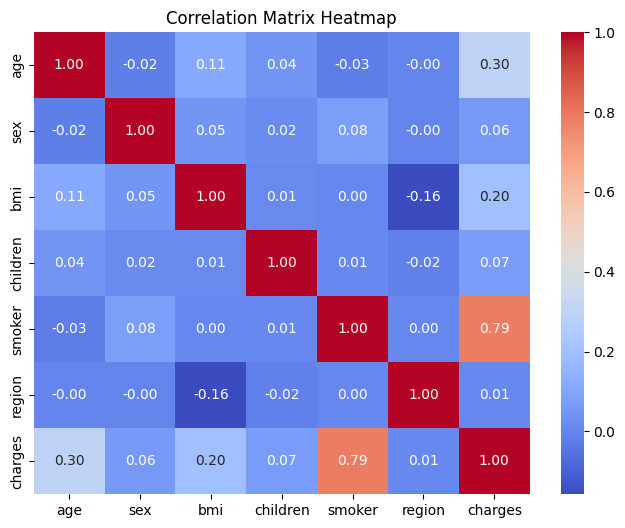

In [45]:
import seaborn as sns
corr = df.corr()
plt.figure(figsize=(8, 6)) 
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

In [42]:
mods = LinearRegression()

In [44]:
df['bmi'].max()

53.13

In [43]:
from sklearn.model_selection import KFold
kfs = KFold(n_splits=6,shuffle=True)
cross_score = cross_val_score(mods,x_train,y_train,cv=kfs) 
for i, result in enumerate(cross_score, 1):
    print(f"  Fold {i}: {result * 100:.2f}%")
    
print(f'Mean Accuracy: {cross_score.mean()* 100:.2f}%')

  Fold 1: 77.78%
  Fold 2: 67.50%
  Fold 3: 65.02%
  Fold 4: 77.92%
  Fold 5: 76.69%
  Fold 6: 72.97%
Mean Accuracy: 72.98%


In [46]:
mods = LinearRegression()
mods.fit(x_train,y_train)

LinearRegression()

In [49]:
r2 = r2_score(y_test,mods.predict(x_test))
rmse = root_mean_squared_error(y_test,mods.predict(x_test))
rmse

5814.246890069995